In [1]:
!python3 --version

Python 3.12.3


In [2]:
!nvidia-smi

Sun Nov  2 14:45:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.65.06              Driver Version: 580.65.06      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H200                    On  |   00000000:1B:00.0 Off |                    0 |
| N/A   42C    P0             79W /  700W |       0MiB / 143771MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [3]:
!apt update -y && apt install pipx -y

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2404/x86_64  InRelease [1581 B]
Get:2 http://archive.ubuntu.com/ubuntu noble InRelease [256 kB]                
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2404/x86_64  Packages [966 kB]
Get:4 http://security.ubuntu.com/ubuntu noble-security InRelease [126 kB]      
Get:5 http://archive.ubuntu.com/ubuntu noble-updates InRelease [126 kB]m
Get:6 http://archive.ubuntu.com/ubuntu noble-backports InRelease [126 kB]3m
Get:7 http://archive.ubuntu.com/ubuntu noble/main amd64 Packages [1808 kB]m
Get:8 http://archive.ubuntu.com/ubuntu noble/restricted amd64 Packages [117 kB]
Get:9 http://archive.ubuntu.com/ubuntu noble/universe amd64 Packages [19.3 MB] 
Get:10 http://security.ubuntu.com/ubuntu noble-security/main amd64 Packages [1599 kB]
Get:11 http://security.ubuntu.com/ubuntu noble-security/restricted amd64 Packages [2638 kB]
Get:12 http://archive.ubuntu.com/ubuntu noble/multiverse amd64 Packages [331

In [4]:
!pipx install vllm==0.11.0

  installed package vllm 0.11.0, installed using Python 3.12.3
  These apps are now globally available
    - vllm
⚠️  Note: '/root/.local/bin' is not on your PATH environment variable. These
    apps will not be globally accessible until your PATH is updated. Run `pipx
    ensurepath` to automatically add it, or manually modify your PATH in your
    shell's config file (i.e. ~/.bashrc).
done! ✨ 🌟 ✨


In [5]:
!~/.local/bin/vllm --help

INFO 11-02 14:47:26 [__init__.py:216] Automatically detected platform cuda.
usage: vllm [-h] [-v] {chat,complete,serve,bench,collect-env,run-batch} ...

vLLM CLI

positional arguments:
  {chat,complete,serve,bench,collect-env,run-batch}
    chat                Generate chat completions via the running API server.
    complete            Generate text completions based on the given prompt
                        via the running API server.
    collect-env         Start collecting environment information.
    run-batch           Run batch prompts and write results to file.

options:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

For full list:            vllm [subcommand] --help=all
For a section:            vllm [subcommand] --help=ModelConfig    (case-insensitive)
For a flag:               vllm [subcommand] --help=max-model-len  (_ or - accepted)
Documentation:            https://docs.vllm.ai


In [6]:
!rm -rf ./TensorRT-Model-Optimizer/

In [7]:
!git clone https://github.com/NVIDIA/TensorRT-Model-Optimizer.git --depth 1 --branch 0.37.0

Cloning into 'TensorRT-Model-Optimizer'...
remote: Enumerating objects: 921, done.
remote: Counting objects: 100% (921/921), done.
remote: Compressing objects: 100% (824/824), done.
remote: Total 921 (delta 133), reused 417 (delta 50), pack-reused 0 (from 0)
Receiving objects: 100% (921/921), 11.30 MiB | 29.36 MiB/s, done.
Resolving deltas: 100% (133/133), done.
Note: switching to 'df0882a63c39a001a1be384b680166a41259045c'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [8]:
!pip3 install -r ./TensorRT-Model-Optimizer/examples/llm_ptq/requirements.txt -e "./TensorRT-Model-Optimizer[hf]"

Obtaining file:///workspace/main/TensorRT-Model-Optimizer
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 110.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.1 MB/s eta 0:00:00
Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Building editable for nvidia-modelopt (pyproject.toml) ... done
  Created wheel for nvidia-modelopt: filename=nvidia_modelopt-0.37.0-0.editable-py3-none-any.whl size=3352 sha256=e50248d0c9fa5e4c37e571f36fb08654c69e5d4ac9119fe8291009937b721b1a
  Store

In [9]:
%env MODEL_PATH=/workspace/main/Yi-34B
%env MODEL_NAME=Yi-34B
%env ROOT_SAVE_PATH=/workspace/main
%env CONCURRENCY_LIST=1 10 50 100 200 300

env: MODEL_PATH=/workspace/main/Yi-34B
env: MODEL_NAME=Yi-34B
env: ROOT_SAVE_PATH=/workspace/main
env: CONCURRENCY_LIST=1 10 50 100 200 300


In [10]:
!hf download 01-ai/Yi-34B --local-dir $MODEL_PATH

Fetching 26 files:   0%|                                 | 0/26 [00:00<?, ?it/s]Downloading 'config.json' to '/workspace/main/Yi-34B/.cache/huggingface/download/8_PA_wEVGiVa2goH2H4KQOQpvVY=.da2913d7857cd6dcc927d03756e627614956a62a.incomplete'

config.json: 100%|█████████████████████████████| 605/605 [00:00<00:00, 2.77MB/s]
Download complete. Moving file to /workspace/main/Yi-34B/config.json

README.md: 0.00B [00:00, ?B/s]

md5: 100%|█████████████████████████████████████| 519/519 [00:00<00:00, 1.88MB/s]
Download complete. Moving file to /workspace/main/Yi-34B/md5
README.md: 87.9kB [00:00, 13.2MB/s]
Download complete. Moving file to /workspace/main/Yi-34B/README.md

.gitattributes: 1.52kB [00:00, 6.18MB/s]
Download complete. Moving file to /workspace/main/Yi-34B/.gitattributes
generation_config.json: 100%|██████████████████| 132/132 [00:00<00:00, 1.05MB/s]
Download complete. Moving file to /workspace/main/Yi-34B/generation_config.json

Yi.svg: 100%|██████████████████████████████████| 980

In [11]:
!./TensorRT-Model-Optimizer/examples/llm_ptq/scripts/huggingface_example.sh --model $MODEL_PATH --quant fp8

model: /workspace/main/Yi-34B
quant: fp8
tp (TensorRT-LLM Checkpoint only): 1
pp (TensorRT-LLM Checkpoint only): 1
sparsity: dense
awq_block_size: 
calib: 512
calib_batch_size: 0
auto_quantize_bits: 
input: 
output: 1024
batch: 2
tasks: quant
lm_eval_tasks: mmlu,gsm8k
lm_eval_limit: 
simple_eval_tasks: mmlu
num_sample: 
use_seq_device_map: false
gpu_max_mem_percentage: 
kv_cache_free_gpu_memory_fraction: 0.8
low_memory_mode: 
calib_dataset: 
+ echo '********** unset all SLURM_, PMI_, PMIX_ Variables **********'
********** unset all SLURM_, PMI_, PMIX_ Variables **********
++ env
++ grep '^SLURM_'
++ cut -d= -f 1
++ env
++ grep '^PMI_'
++ cut -d= -f 1
++ env
++ grep '^PMIX_'
++ cut -d= -f 1
+ '[' -z /workspace/main/Yi-34B ']'
+ '[' dense = dense ']'
+ ENABLE_SPARSITY=false
+ case $SPARSITY_FMT in
+ IFS=,
+ for qformat in $QFORMAT
+ case $qformat in
+ IFS=' '
+++ readlink -f ./TensorRT-Model-Optimizer/examples/llm_ptq/scripts/huggingface_example.sh
++ dirname /workspace/main/TensorRT-Mod

In [12]:
%%bash --bg

~/.local/bin/vllm serve ${ROOT_SAVE_PATH}/saved_models_${MODEL_NAME}_fp8 \
    --served_model_name ${MODEL_NAME}-fp8 \
    --kv-cache-dtype fp8 \
    --async-scheduling \
    --no-enable-prefix-caching &> /tmp/vllm.log

In [13]:
!tail -f /tmp/vllm.log | sed '/Application startup complete./q'

INFO 11-02 14:57:54 [__init__.py:216] Automatically detected platform cuda.
(APIServer pid=2929) INFO 11-02 14:57:57 [api_server.py:1839] vLLM API server version 0.11.0
(APIServer pid=2929) INFO 11-02 14:57:57 [utils.py:233] non-default args: {'model_tag': '/workspace/main/saved_models_Yi-34B_fp8', 'model': '/workspace/main/saved_models_Yi-34B_fp8', 'served_model_name': ['Yi-34B-fp8'], 'kv_cache_dtype': 'fp8', 'enable_prefix_caching': False, 'async_scheduling': True}
(APIServer pid=2929) INFO 11-02 14:58:02 [model.py:547] Resolved architecture: LlamaForCausalLM
(APIServer pid=2929) `torch_dtype` is deprecated! Use `dtype` instead!
(APIServer pid=2929) INFO 11-02 14:58:02 [model.py:1510] Using max model len 4096
(APIServer pid=2929) INFO 11-02 14:58:02 [cache.py:180] Using fp8 data type to store kv cache. It reduces the GPU memory footprint and boosts the performance. Meanwhile, it may cause accuracy drop without a proper scaling factor.
(APIServer pid=2929) INFO 11-02 14:58:02 [arg_uti

In [14]:
!ps aux | grep vllm

root        2929 24.5  0.0 11118700 975440 ?     Sl   14:57   0:23 /root/.local/share/pipx/venvs/vllm/bin/python /root/.local/bin/vllm serve /workspace/main/saved_models_Yi-34B_fp8 --served_model_name Yi-34B-fp8 --kv-cache-dtype fp8 --async-scheduling --no-enable-prefix-caching
root        3196  0.0  0.0  17044 12564 ?        S    14:58   0:00 /root/.local/share/pipx/venvs/vllm/bin/python -c from multiprocessing.resource_tracker import main;main(34)
root        3687  0.0  0.0   4752  3480 pts/1    Ss+  14:59   0:00 /bin/bash -c ps aux | grep vllm
root        3703  0.0  0.0   3956  2016 pts/1    S+   14:59   0:00 grep vllm


In [15]:
!curl -v http://127.0.0.1:8000/health

*   Trying 127.0.0.1:8000...
* Connected to 127.0.0.1 (127.0.0.1) port 8000
> GET /health HTTP/1.1
> Host: 127.0.0.1:8000
> User-Agent: curl/8.5.0
> Accept: */*
> 
< HTTP/1.1 200 OK
< date: Sun, 02 Nov 2025 14:59:25 GMT
< server: uvicorn
< content-length: 0
< 
* Connection #0 to host 127.0.0.1 left intact


In [16]:
!curl http://localhost:8000/v1/models | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   499  100   499    0     0   180k      0 --:--:-- --:--:-- --:--:--  243k
{
  "object": "list",
  "data": [
    {
      "id": "Yi-34B-fp8",
      "object": "model",
      "created": 1762095566,
      "owned_by": "vllm",
      "root": "/workspace/main/saved_models_Yi-34B_fp8",
      "parent": null,
      "max_model_len": 4096,
      "permission": [
        {
          "id": "modelperm-c5cda6f2f48942c0b6f3cacc3f1c7087",
          "object": "model_permission",
          "created": 1762095566,
          "allow_create_engine": false,
          "allow_sampling": true,
          "allow_logprobs": true,
          "allow_search_indices": false,
          "allow_view": true,
          "allow_fine_tuning": false,
          "organization": "*",
          "group": null,
          "is_blocking": false
        }
      ]
    }
  ]
}


In [17]:
!pip3 install aiperf==0.2.0

  Using cached prometheus_client-0.23.1-py3-none-any.whl.metadata (1.9 kB)
  Using cached setproctitle-1.3.7-cp312-cp312-manylinux1_x86_64.manylinux_2_28_x86_64.manylinux_2_5_x86_64.whl.metadata (10 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pygments-2.19.2-py3-none-any.whl.metadata (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 150.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 201.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.4/753.4 kB 153.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 227.0 MB/s eta 0:00:00
Using cached prometheus_client-0.23.1-py3-none-any.whl (61 kB)
Using cached setproctitle-1.3.7-cp312-cp312-manylinux1_x86_64.manylinux_2_28_x86_64.manylinux_2_5_x86_64.whl (32 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.7/702.7 kB 161.2 MB/s eta 0:00:00
Using cached pygments-2.19.2-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [18]:
!rm -r artifacts

rm: cannot remove 'artifacts': No such file or directory


In [19]:
import os

os.environ["AIPERF_COMMAND"] = "--ui-type simple --tokenizer {MODEL_PATH} \
--url 127.0.0.1:8000 --streaming --endpoint-type completions \
--output-tokens-mean 256 --output-tokens-stddev 0 \
--synthetic-input-tokens-mean 256 --synthetic-input-tokens-stddev 0 \
--benchmark-duration 20 --extra-inputs ignore_eos:true".format(MODEL_PATH=os.environ["MODEL_PATH"])

In [20]:
!echo $AIPERF_COMMAND

--ui-type simple --tokenizer /workspace/main/Yi-34B --url 127.0.0.1:8000 --streaming --endpoint-type completions --output-tokens-mean 256 --output-tokens-stddev 0 --synthetic-input-tokens-mean 256 --synthetic-input-tokens-stddev 0 --benchmark-duration 20 --extra-inputs ignore_eos:true


In [21]:
!for c in ${CONCURRENCY_LIST}; do \
aiperf profile  ${AIPERF_COMMAND} -m ${MODEL_NAME}-fp8 --concurrency $c; \
done

14:59:34.947346 INFO     Starting AIPerf System                 ]8;id=48347;file:///usr/local/lib/python3.12/dist-packages/aiperf/cli_runner.py\cli_runner.py]8;;\:]8;id=468239;file:///usr/local/lib/python3.12/dist-packages/aiperf/cli_runner.py#75\75]8;;\
14:59:38.269619 INFO     Record metrics    ]8;id=946963;file:///usr/local/lib/python3.12/dist-packages/aiperf/post_processors/record_export_results_processor.py\record_export_results_processor.py]8;;\:]8;id=21736;file:///usr/local/lib/python3.12/dist-packages/aiperf/post_processors/record_export_results_processor.py#49\49]8;;\
                         export enabled:                                        
                         artifacts/Yi-34B-                                      
                         fp8-openai-comple                                      
                         tions-concurrency                                      
                         1/profile_export.                                  

In [22]:
!ls artifacts

Yi-34B-fp8-openai-completions-concurrency1
Yi-34B-fp8-openai-completions-concurrency10
Yi-34B-fp8-openai-completions-concurrency100
Yi-34B-fp8-openai-completions-concurrency200
Yi-34B-fp8-openai-completions-concurrency300
Yi-34B-fp8-openai-completions-concurrency50


In [23]:
!pkill vllm

In [24]:
!sleep 5

In [25]:
%%bash --bg

~/.local/bin/vllm serve ${MODEL_PATH} \
    --served_model_name ${MODEL_NAME} \
    --async-scheduling \
    --no-enable-prefix-caching &> /tmp/vllm.log

In [26]:
!tail -f /tmp/vllm.log | sed '/Application startup complete./q'

(APIServer pid=2929) INFO:     127.0.0.1:59890 - "POST /v1/completions HTTP/1.1" 200 OK
(APIServer pid=2929) INFO:     127.0.0.1:59998 - "POST /v1/completions HTTP/1.1" 200 OK
(APIServer pid=2929) INFO:     127.0.0.1:50946 - "POST /v1/completions HTTP/1.1" 200 OK
(APIServer pid=2929) INFO 11-02 15:02:34 [loggers.py:127] Engine 000: Avg prompt throughput: 4044.4 tokens/s, Avg generation throughput: 4195.8 tokens/s, Running: 0 reqs, Waiting: 0 reqs, GPU KV cache usage: 0.0%, Prefix cache hit rate: 0.0%
(APIServer pid=2929) INFO 11-02 15:02:35 [launcher.py:99] Shutting down FastAPI HTTP server.
(Worker pid=3331) INFO 11-02 15:02:35 [multiproc_executor.py:558] Parent process exited, terminating worker
(Worker pid=3331) INFO 11-02 15:02:35 [multiproc_executor.py:599] WorkerProc shutting down.
(APIServer pid=2929) INFO:     Shutting down
(APIServer pid=2929) INFO:     Waiting for application shutdown.
(APIServer pid=2929) INFO:     Application shutdown complete.
tail: /tmp/vllm.log: file tru

In [27]:
!curl -v http://127.0.0.1:8000/health

*   Trying 127.0.0.1:8000...
* Connected to 127.0.0.1 (127.0.0.1) port 8000
> GET /health HTTP/1.1
> Host: 127.0.0.1:8000
> User-Agent: curl/8.5.0
> Accept: */*
> 
< HTTP/1.1 200 OK
< date: Sun, 02 Nov 2025 15:03:57 GMT
< server: uvicorn
< content-length: 0
< 
* Connection #0 to host 127.0.0.1 left intact


In [28]:
!ps aux | grep -i vllm

root       16318 29.0  0.0 11086716 941848 ?     Sl   15:02   0:22 /root/.local/share/pipx/venvs/vllm/bin/python /root/.local/bin/vllm serve /workspace/main/Yi-34B --served_model_name Yi-34B --async-scheduling --no-enable-prefix-caching
root       16453  0.0  0.0  17044 12616 ?        S    15:02   0:00 /root/.local/share/pipx/venvs/vllm/bin/python -c from multiprocessing.resource_tracker import main;main(34)
root       16454 93.4  0.0 11835904 899520 ?     Sl   15:02   1:07 VLLM::EngineCore
root       16588  100  0.1 165649428 2833156 ?   Rl   15:02   1:08 VLLM::Worker
root       16912  0.0  0.0   4752  3440 pts/1    Ss+  15:03   0:00 /bin/bash -c ps aux | grep -i vllm
root       16928  0.0  0.0   3956  2064 pts/1    S+   15:03   0:00 grep -i vllm


In [29]:
!curl http://localhost:8000/v1/models | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   478  100   478    0     0   169k      0 --:--:-- --:--:-- --:--:--  233k
{
  "object": "list",
  "data": [
    {
      "id": "Yi-34B",
      "object": "model",
      "created": 1762095838,
      "owned_by": "vllm",
      "root": "/workspace/main/Yi-34B",
      "parent": null,
      "max_model_len": 4096,
      "permission": [
        {
          "id": "modelperm-3b90eafa4ea94dd09a4f0890fd5ce6c6",
          "object": "model_permission",
          "created": 1762095838,
          "allow_create_engine": false,
          "allow_sampling": true,
          "allow_logprobs": true,
          "allow_search_indices": false,
          "allow_view": true,
          "allow_fine_tuning": false,
          "organization": "*",
          "group": null,
          "is_blocking": false
        }
      ]
    }
  ]
}


In [30]:
!for c in ${CONCURRENCY_LIST}; do \
aiperf profile  ${AIPERF_COMMAND} -m ${MODEL_NAME} --concurrency $c; \
done

15:03:59.550952 INFO     Starting AIPerf System                 ]8;id=236144;file:///usr/local/lib/python3.12/dist-packages/aiperf/cli_runner.py\cli_runner.py]8;;\:]8;id=179323;file:///usr/local/lib/python3.12/dist-packages/aiperf/cli_runner.py#75\75]8;;\
15:04:02.844101 INFO     Record metrics    ]8;id=165381;file:///usr/local/lib/python3.12/dist-packages/aiperf/post_processors/record_export_results_processor.py\record_export_results_processor.py]8;;\:]8;id=124597;file:///usr/local/lib/python3.12/dist-packages/aiperf/post_processors/record_export_results_processor.py#49\49]8;;\
                         export enabled:                                        
                         artifacts/Yi-34B-                                      
                         openai-completion                                      
                         s-concurrency1/pr                                      
                         ofile_export.json                                

In [31]:
!pkill vllm

In [32]:
!sleep 5

In [33]:
!ps aux | grep vllm

root       29441 10.0  0.0   4752  3528 pts/1    Ss+  15:07   0:00 /bin/bash -c ps aux | grep vllm
root       29457  0.0  0.0   3956  2028 pts/1    S+   15:07   0:00 grep vllm


In [34]:
%%bash --bg
~/.local/bin/vllm serve ${ROOT_SAVE_PATH}/saved_models_${MODEL_NAME}_fp8 \
    --served_model_name ${MODEL_NAME}-fp8-tp2 \
    --tensor-parallel-size 2 \
    --kv-cache-dtype fp8 \
    --async-scheduling \
    --no-enable-prefix-caching &> /tmp/vllm.log

In [35]:
!tail -f /tmp/vllm.log | sed '/Application startup complete./q'

INFO 11-02 15:07:05 [__init__.py:216] Automatically detected platform cuda.
(APIServer pid=29483) INFO 11-02 15:07:07 [api_server.py:1839] vLLM API server version 0.11.0
(APIServer pid=29483) INFO 11-02 15:07:07 [utils.py:233] non-default args: {'model_tag': '/workspace/main/saved_models_Yi-34B_fp8', 'model': '/workspace/main/saved_models_Yi-34B_fp8', 'served_model_name': ['Yi-34B-fp8-tp2'], 'tensor_parallel_size': 2, 'kv_cache_dtype': 'fp8', 'enable_prefix_caching': False, 'async_scheduling': True}
(APIServer pid=29483) INFO 11-02 15:07:07 [model.py:547] Resolved architecture: LlamaForCausalLM
(APIServer pid=29483) `torch_dtype` is deprecated! Use `dtype` instead!
(APIServer pid=29483) INFO 11-02 15:07:07 [model.py:1510] Using max model len 4096
(APIServer pid=29483) INFO 11-02 15:07:07 [cache.py:180] Using fp8 data type to store kv cache. It reduces the GPU memory footprint and boosts the performance. Meanwhile, it may cause accuracy drop without a proper scaling factor.
(APIServer p

In [36]:
!curl -v http://127.0.0.1:8000/health

*   Trying 127.0.0.1:8000...
* Connected to 127.0.0.1 (127.0.0.1) port 8000
> GET /health HTTP/1.1
> Host: 127.0.0.1:8000
> User-Agent: curl/8.5.0
> Accept: */*
> 
< HTTP/1.1 200 OK
< date: Sun, 02 Nov 2025 15:08:33 GMT
< server: uvicorn
< content-length: 0
< 
* Connection #0 to host 127.0.0.1 left intact


In [37]:
!curl http://localhost:8000/v1/models | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   503  100   503    0     0   166k      0 --:--:-- --:--:-- --:--:--  245k
{
  "object": "list",
  "data": [
    {
      "id": "Yi-34B-fp8-tp2",
      "object": "model",
      "created": 1762096114,
      "owned_by": "vllm",
      "root": "/workspace/main/saved_models_Yi-34B_fp8",
      "parent": null,
      "max_model_len": 4096,
      "permission": [
        {
          "id": "modelperm-7a2127ee77c24b02859a685c4c33dff4",
          "object": "model_permission",
          "created": 1762096114,
          "allow_create_engine": false,
          "allow_sampling": true,
          "allow_logprobs": true,
          "allow_search_indices": false,
          "allow_view": true,
          "allow_fine_tuning": false,
          "organization": "*",
          "group": null,
          "is_blocking": false
        }
      ]
    }
  ]
}


In [38]:
!for c in ${CONCURRENCY_LIST}; do \
aiperf profile  ${AIPERF_COMMAND} -m ${MODEL_NAME}-fp8-tp2 --concurrency $c; \
done

15:08:35.135091 INFO     Starting AIPerf System                 ]8;id=652684;file:///usr/local/lib/python3.12/dist-packages/aiperf/cli_runner.py\cli_runner.py]8;;\:]8;id=846511;file:///usr/local/lib/python3.12/dist-packages/aiperf/cli_runner.py#75\75]8;;\
15:08:38.684408 INFO     Registered Worker Manager (id: ]8;id=191849;file:///usr/local/lib/python3.12/dist-packages/aiperf/controller/system_controller.py\system_controller.py]8;;\:]8;id=86700;file:///usr/local/lib/python3.12/dist-packages/aiperf/controller/system_controller.py#291\291]8;;\
                         'worker_manager_c694d414')                             
15:08:38.686852 INFO     Registered Timing Manager (id: ]8;id=949597;file:///usr/local/lib/python3.12/dist-packages/aiperf/controller/system_controller.py\system_controller.py]8;;\:]8;id=666822;file:///usr/local/lib/python3.12/dist-packages/aiperf/controller/system_controller.py#291\291]8;;\
                         'timing_manager_1ef82b9d')   

In [39]:
!pkill vllm

In [40]:
!sleep 5

In [41]:
!ps aux | grep vllm

root       43055 11.1  0.0   4752  3516 pts/1    Ss+  15:11   0:00 /bin/bash -c ps aux | grep vllm
root       43071  0.0  0.0   3956  2036 pts/1    S+   15:11   0:00 grep vllm


In [42]:
%%bash --bg

~/.local/bin/vllm serve ${MODEL_PATH} \
    --served_model_name ${MODEL_NAME}-tp2 \
    --tensor-parallel-size 2 \
    --async-scheduling \
    --no-enable-prefix-caching &> /tmp/vllm.log

In [43]:
!tail -f /tmp/vllm.log | sed '/Application startup complete./q'

INFO 11-02 15:11:36 [__init__.py:216] Automatically detected platform cuda.
(APIServer pid=43097) INFO 11-02 15:11:38 [api_server.py:1839] vLLM API server version 0.11.0
(APIServer pid=43097) INFO 11-02 15:11:38 [utils.py:233] non-default args: {'model_tag': '/workspace/main/Yi-34B', 'model': '/workspace/main/Yi-34B', 'served_model_name': ['Yi-34B-tp2'], 'tensor_parallel_size': 2, 'enable_prefix_caching': False, 'async_scheduling': True}
(APIServer pid=43097) INFO 11-02 15:11:38 [model.py:547] Resolved architecture: LlamaForCausalLM
(APIServer pid=43097) `torch_dtype` is deprecated! Use `dtype` instead!
(APIServer pid=43097) INFO 11-02 15:11:38 [model.py:1510] Using max model len 4096
(APIServer pid=43097) INFO 11-02 15:11:39 [arg_utils.py:1293] Defaulting to mp-based distributed executor backend for async scheduling.
(APIServer pid=43097) INFO 11-02 15:11:39 [scheduler.py:205] Chunked prefill is enabled with max_num_batched_tokens=8192.
INFO 11-02 15:11:41 [__init__.py:216] Automatica

In [44]:
!curl -v http://127.0.0.1:8000/health

*   Trying 127.0.0.1:8000...
* Connected to 127.0.0.1 (127.0.0.1) port 8000
> GET /health HTTP/1.1
> Host: 127.0.0.1:8000
> User-Agent: curl/8.5.0
> Accept: */*
> 
< HTTP/1.1 200 OK
< date: Sun, 02 Nov 2025 15:12:50 GMT
< server: uvicorn
< content-length: 0
< 
* Connection #0 to host 127.0.0.1 left intact


In [45]:
!curl http://localhost:8000/v1/models | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   482  100   482    0     0   159k      0 --:--:-- --:--:-- --:--:--  235k
{
  "object": "list",
  "data": [
    {
      "id": "Yi-34B-tp2",
      "object": "model",
      "created": 1762096371,
      "owned_by": "vllm",
      "root": "/workspace/main/Yi-34B",
      "parent": null,
      "max_model_len": 4096,
      "permission": [
        {
          "id": "modelperm-ebf77e9ceeed4f7bb0c624b1b974bebf",
          "object": "model_permission",
          "created": 1762096371,
          "allow_create_engine": false,
          "allow_sampling": true,
          "allow_logprobs": true,
          "allow_search_indices": false,
          "allow_view": true,
          "allow_fine_tuning": false,
          "organization": "*",
          "group": null,
          "is_blocking": false
        }
      ]
    }
  ]
}


In [46]:
!for c in ${CONCURRENCY_LIST}; do \
aiperf profile  ${AIPERF_COMMAND} -m ${MODEL_NAME}-tp2 --concurrency $c; \
done

15:12:52.428679 INFO     Starting AIPerf System                 ]8;id=729534;file:///usr/local/lib/python3.12/dist-packages/aiperf/cli_runner.py\cli_runner.py]8;;\:]8;id=931068;file:///usr/local/lib/python3.12/dist-packages/aiperf/cli_runner.py#75\75]8;;\
15:12:56.041238 INFO     Registered Timing Manager (id: ]8;id=483028;file:///usr/local/lib/python3.12/dist-packages/aiperf/controller/system_controller.py\system_controller.py]8;;\:]8;id=259273;file:///usr/local/lib/python3.12/dist-packages/aiperf/controller/system_controller.py#291\291]8;;\
                         'timing_manager_b559f660')                             
15:12:56.042280 INFO     Record metrics    ]8;id=472085;file:///usr/local/lib/python3.12/dist-packages/aiperf/post_processors/record_export_results_processor.py\record_export_results_processor.py]8;;\:]8;id=396439;file:///usr/local/lib/python3.12/dist-packages/aiperf/post_processors/record_export_results_processor.py#49\49]8;;\
                

In [47]:
!ls artifacts

Yi-34B-fp8-openai-completions-concurrency1
Yi-34B-fp8-openai-completions-concurrency10
Yi-34B-fp8-openai-completions-concurrency100
Yi-34B-fp8-openai-completions-concurrency200
Yi-34B-fp8-openai-completions-concurrency300
Yi-34B-fp8-openai-completions-concurrency50
Yi-34B-fp8-tp2-openai-completions-concurrency1
Yi-34B-fp8-tp2-openai-completions-concurrency10
Yi-34B-fp8-tp2-openai-completions-concurrency100
Yi-34B-fp8-tp2-openai-completions-concurrency200
Yi-34B-fp8-tp2-openai-completions-concurrency300
Yi-34B-fp8-tp2-openai-completions-concurrency50
Yi-34B-openai-completions-concurrency1
Yi-34B-openai-completions-concurrency10
Yi-34B-openai-completions-concurrency100
Yi-34B-openai-completions-concurrency200
Yi-34B-openai-completions-concurrency300
Yi-34B-openai-completions-concurrency50
Yi-34B-tp2-openai-completions-concurrency1
Yi-34B-tp2-openai-completions-concurrency10
Yi-34B-tp2-openai-completions-concurrency100
Yi-34B-tp2-openai-completions-concurrency200
Yi-34B-tp2-openai-complet

In [48]:
!pip3 install seaborn

In [49]:
import pandas as pd 
import seaborn as sns

In [50]:
def normalize_df_benchmark(df):
    df.melt(id_vars=['Metric'], var_name='stat', value_name='value').pivot_table(index=None, columns=['Metric', 'stat'], values='value', aggfunc='first')
    normalized = (
        df.melt(id_vars=['Metric'], var_name='stat', value_name='value')
          .pivot_table(index=None, columns=['Metric', 'stat'], values='value', aggfunc='first')
    )
    
    # Flatten the MultiIndex into single-level columns like Metric_stat
    normalized.columns = [f"{metric.strip().replace(' ', '_')}_{stat}" for metric, stat in normalized.columns]
    normalized = normalized.reset_index(drop=True)
    normalized = normalized.apply(pd.to_numeric, errors='coerce')
    
    return normalized

In [51]:
profile_export_aiperf_path = "artifacts/{}-openai-completions-concurrency{}/profile_export_aiperf.csv"

df_benchmark_con = []
df_tp2_benchmark_con = []
df_fp8_benchmark_con = []
df_fp8_tp2_benchmark_con = []
concurrency_list = list(map(int, os.environ["CONCURRENCY_LIST"].split()))
for c in concurrency_list:
    df_benchmark_con.append(pd.read_csv(profile_export_aiperf_path.format(os.environ["MODEL_NAME"], str(c)), on_bad_lines='skip'))
    df_tp2_benchmark_con.append(pd.read_csv(profile_export_aiperf_path.format(os.environ["MODEL_NAME"] + "-tp2", str(c)), on_bad_lines='skip'))
    df_fp8_benchmark_con.append(pd.read_csv(profile_export_aiperf_path.format(os.environ["MODEL_NAME"] + "-fp8", str(c)), on_bad_lines='skip'))
    df_fp8_tp2_benchmark_con.append(pd.read_csv(profile_export_aiperf_path.format(os.environ["MODEL_NAME"] + "-fp8-tp2", str(c)),on_bad_lines='skip'))

In [52]:
df_benchmark_con = list(map(normalize_df_benchmark, df_benchmark_con))
df_tp2_benchmark_con = list(map(normalize_df_benchmark, df_tp2_benchmark_con))
df_fp8_benchmark_con = list(map(normalize_df_benchmark, df_fp8_benchmark_con))
df_fp8_tp2_benchmark_con = list(map(normalize_df_benchmark, df_fp8_tp2_benchmark_con))

In [53]:
df_benchmark_con = [i.assign(concurrency=c) for i,c in zip(df_benchmark_con, concurrency_list)]
df_tp2_benchmark_con = [i.assign(concurrency=c) for i,c in zip(df_tp2_benchmark_con, concurrency_list)]
df_fp8_benchmark_con = [i.assign(concurrency=c) for i,c in zip(df_fp8_benchmark_con, concurrency_list)]
df_fp8_tp2_benchmark_con = [i.assign(concurrency=c) for i,c in zip(df_fp8_tp2_benchmark_con, concurrency_list)]

In [54]:
df_benchmark = pd.concat(df_benchmark_con)
df_tp2_benchmark = pd.concat(df_tp2_benchmark_con)
df_fp8_benchmark = pd.concat(df_fp8_benchmark_con)
df_fp8_tp2_benchmark = pd.concat(df_fp8_tp2_benchmark_con)


In [55]:
throughput_columns = df_benchmark.columns[df_benchmark.columns.str.contains(r".*Throughput.*")]
df_tp2_benchmark[throughput_columns] = df_tp2_benchmark[throughput_columns] / 2
df_fp8_tp2_benchmark[throughput_columns] = df_fp8_tp2_benchmark[throughput_columns] / 2


In [56]:
df_benchmark.columns

Index(['Benchmark_Duration_(sec)_avg', 'Input_Sequence_Length_(tokens)_avg',
       'Input_Sequence_Length_(tokens)_max',
       'Input_Sequence_Length_(tokens)_min',
       'Input_Sequence_Length_(tokens)_p1',
       'Input_Sequence_Length_(tokens)_p10',
       'Input_Sequence_Length_(tokens)_p25',
       'Input_Sequence_Length_(tokens)_p5',
       'Input_Sequence_Length_(tokens)_p50',
       'Input_Sequence_Length_(tokens)_p75',
       ...
       'Time_to_Second_Token_(ms)_p50', 'Time_to_Second_Token_(ms)_p75',
       'Time_to_Second_Token_(ms)_p90', 'Time_to_Second_Token_(ms)_p95',
       'Time_to_Second_Token_(ms)_p99', 'Time_to_Second_Token_(ms)_std',
       'Total_Input_Sequence_Length_(tokens)_avg',
       'Total_Output_Sequence_Length_(tokens)_avg',
       'Total_Output_Tokens_(tokens)_avg', 'concurrency'],
      dtype='object', length=128)

In [57]:
df_benchmark

,Benchmark_Duration_(sec)_avg,Input_Sequence_Length_(tokens)_avg,Input_Sequence_Length_(tokens)_max,Input_Sequence_Length_(tokens)_min,Input_Sequence_Length_(tokens)_p1,Input_Sequence_Length_(tokens)_p10,Input_Sequence_Length_(tokens)_p25,Input_Sequence_Length_(tokens)_p5,Input_Sequence_Length_(tokens)_p50,Input_Sequence_Length_(tokens)_p75,...,Time_to_Second_Token_(ms)_p50,Time_to_Second_Token_(ms)_p75,Time_to_Second_Token_(ms)_p90,Time_to_Second_Token_(ms)_p95,Time_to_Second_Token_(ms)_p99,Time_to_Second_Token_(ms)_std,Total_Input_Sequence_Length_(tokens)_avg,Total_Output_Sequence_Length_(tokens)_avg,Total_Output_Tokens_(tokens)_avg,concurrency
0,19.06,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,18.68,18.77,18.89,18.93,18.97,0.17,1024.0,1028.0,1028.0,1
0,20.98,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,19.27,19.32,19.94,19.95,19.95,0.79,10240.0,10221.0,10221.0,10
0,20.09,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,429.23,432.18,432.35,432.37,432.45,199.28,38400.0,38347.0,38347.0,50
0,26.49,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,821.27,861.98,865.45,865.79,866.02,376.05,76800.0,76668.0,76668.0,100
0,28.56,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,863.30,866.05,867.48,868.23,868.58,303.96,102400.0,102259.0,102259.0,200
0,20.44,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,863.01,869.35,874.82,875.08,875.16,262.81,76800.0,76702.0,76702.0,300


In [58]:
df_benchmark = pd.concat([
    df_benchmark.assign(model=os.environ["MODEL_NAME"]),
    df_tp2_benchmark.assign(model=os.environ["MODEL_NAME"]+"-tp2"),
    df_fp8_benchmark.assign(model=os.environ["MODEL_NAME"]+"-fp8"),
    df_fp8_tp2_benchmark.assign(model=os.environ["MODEL_NAME"]+"-fp8-tp2"),
], ignore_index=True)
df_benchmark

,Benchmark_Duration_(sec)_avg,Input_Sequence_Length_(tokens)_avg,Input_Sequence_Length_(tokens)_max,Input_Sequence_Length_(tokens)_min,Input_Sequence_Length_(tokens)_p1,Input_Sequence_Length_(tokens)_p10,Input_Sequence_Length_(tokens)_p25,Input_Sequence_Length_(tokens)_p5,Input_Sequence_Length_(tokens)_p50,Input_Sequence_Length_(tokens)_p75,...,Time_to_Second_Token_(ms)_p75,Time_to_Second_Token_(ms)_p90,Time_to_Second_Token_(ms)_p95,Time_to_Second_Token_(ms)_p99,Time_to_Second_Token_(ms)_std,Total_Input_Sequence_Length_(tokens)_avg,Total_Output_Sequence_Length_(tokens)_avg,Total_Output_Tokens_(tokens)_avg,concurrency,model
0,19.06,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,18.77,18.89,18.93,18.97,0.17,1024.0,1028.0,1028.0,1,Yi-34B
1,20.98,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,19.32,19.94,19.95,19.95,0.79,10240.0,10221.0,10221.0,10,Yi-34B
2,20.09,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,432.18,432.35,432.37,432.45,199.28,38400.0,38347.0,38347.0,50,Yi-34B
3,26.49,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,861.98,865.45,865.79,866.02,376.05,76800.0,76668.0,76668.0,100,Yi-34B
4,28.56,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,866.05,867.48,868.23,868.58,303.96,102400.0,102259.0,102259.0,200,Yi-34B
5,20.44,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,869.35,874.82,875.08,875.16,262.81,76800.0,76702.0,76702.0,300,Yi-34B
6,18.00,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,11.62,11.72,11.76,11.78,0.33,1536.0,1534.0,1534.0,1,Yi-34B-tp2
7,23.00,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,21.47,21.72,111.36,122.00,26.27,17920.0,17889.0,17889.0,10,Yi-34B-tp2
8,20.84,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,259.07,316.92,316.95,317.07,124.40,64000.0,63886.0,63886.0,50,Yi-34B-tp2
9,21.20,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,492.67,495.69,511.23,511.40,230.85,102400.0,102238.0,102238.0,100,Yi-34B-tp2


In [59]:
df_benchmark.columns

Index(['Benchmark_Duration_(sec)_avg', 'Input_Sequence_Length_(tokens)_avg',
       'Input_Sequence_Length_(tokens)_max',
       'Input_Sequence_Length_(tokens)_min',
       'Input_Sequence_Length_(tokens)_p1',
       'Input_Sequence_Length_(tokens)_p10',
       'Input_Sequence_Length_(tokens)_p25',
       'Input_Sequence_Length_(tokens)_p5',
       'Input_Sequence_Length_(tokens)_p50',
       'Input_Sequence_Length_(tokens)_p75',
       ...
       'Time_to_Second_Token_(ms)_p75', 'Time_to_Second_Token_(ms)_p90',
       'Time_to_Second_Token_(ms)_p95', 'Time_to_Second_Token_(ms)_p99',
       'Time_to_Second_Token_(ms)_std',
       'Total_Input_Sequence_Length_(tokens)_avg',
       'Total_Output_Sequence_Length_(tokens)_avg',
       'Total_Output_Tokens_(tokens)_avg', 'concurrency', 'model'],
      dtype='object', length=129)

In [60]:
list(df_benchmark.columns)

['Benchmark_Duration_(sec)_avg',
 'Input_Sequence_Length_(tokens)_avg',
 'Input_Sequence_Length_(tokens)_max',
 'Input_Sequence_Length_(tokens)_min',
 'Input_Sequence_Length_(tokens)_p1',
 'Input_Sequence_Length_(tokens)_p10',
 'Input_Sequence_Length_(tokens)_p25',
 'Input_Sequence_Length_(tokens)_p5',
 'Input_Sequence_Length_(tokens)_p50',
 'Input_Sequence_Length_(tokens)_p75',
 'Input_Sequence_Length_(tokens)_p90',
 'Input_Sequence_Length_(tokens)_p95',
 'Input_Sequence_Length_(tokens)_p99',
 'Input_Sequence_Length_(tokens)_std',
 'Inter_Chunk_Latency_(ms)_avg',
 'Inter_Chunk_Latency_(ms)_max',
 'Inter_Chunk_Latency_(ms)_min',
 'Inter_Chunk_Latency_(ms)_p1',
 'Inter_Chunk_Latency_(ms)_p10',
 'Inter_Chunk_Latency_(ms)_p25',
 'Inter_Chunk_Latency_(ms)_p5',
 'Inter_Chunk_Latency_(ms)_p50',
 'Inter_Chunk_Latency_(ms)_p75',
 'Inter_Chunk_Latency_(ms)_p90',
 'Inter_Chunk_Latency_(ms)_p95',
 'Inter_Chunk_Latency_(ms)_p99',
 'Inter_Chunk_Latency_(ms)_std',
 'Inter_Token_Latency_(ms)_avg',
 '

In [61]:
df_benchmark[df_benchmark["concurrency"] == 1]

,Benchmark_Duration_(sec)_avg,Input_Sequence_Length_(tokens)_avg,Input_Sequence_Length_(tokens)_max,Input_Sequence_Length_(tokens)_min,Input_Sequence_Length_(tokens)_p1,Input_Sequence_Length_(tokens)_p10,Input_Sequence_Length_(tokens)_p25,Input_Sequence_Length_(tokens)_p5,Input_Sequence_Length_(tokens)_p50,Input_Sequence_Length_(tokens)_p75,...,Time_to_Second_Token_(ms)_p75,Time_to_Second_Token_(ms)_p90,Time_to_Second_Token_(ms)_p95,Time_to_Second_Token_(ms)_p99,Time_to_Second_Token_(ms)_std,Total_Input_Sequence_Length_(tokens)_avg,Total_Output_Sequence_Length_(tokens)_avg,Total_Output_Tokens_(tokens)_avg,concurrency,model
0,19.06,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,18.77,18.89,18.93,18.97,0.17,1024.0,1028.0,1028.0,1,Yi-34B
6,18.00,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,11.62,11.72,11.76,11.78,0.33,1536.0,1534.0,1534.0,1,Yi-34B-tp2
12,19.88,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,10.86,10.95,10.98,11.00,0.12,1792.0,1789.0,1789.0,1,Yi-34B-fp8
18,18.17,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,...,7.69,7.72,7.72,7.72,0.25,2304.0,2301.0,2301.0,1,Yi-34B-fp8-tp2


<Axes: xlabel='Time_to_First_Token_(ms)_avg', ylabel='Output_Token_Throughput_(tokens/sec)_avg'>

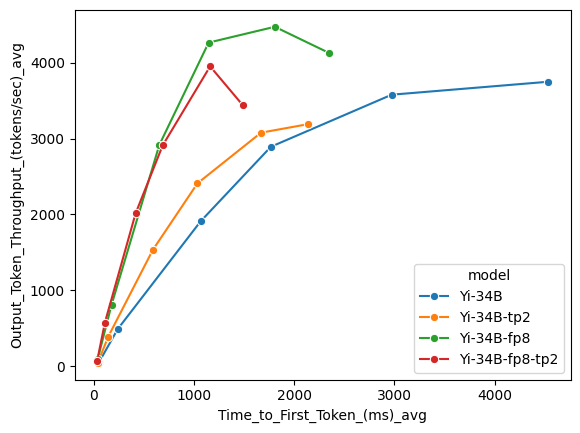

In [62]:
sns.lineplot(data=df_benchmark, x="Time_to_First_Token_(ms)_avg", y="Output_Token_Throughput_(tokens/sec)_avg", hue="model", marker="o")

<Axes: xlabel='Inter_Token_Latency_(ms)_avg', ylabel='Output_Token_Throughput_(tokens/sec)_avg'>

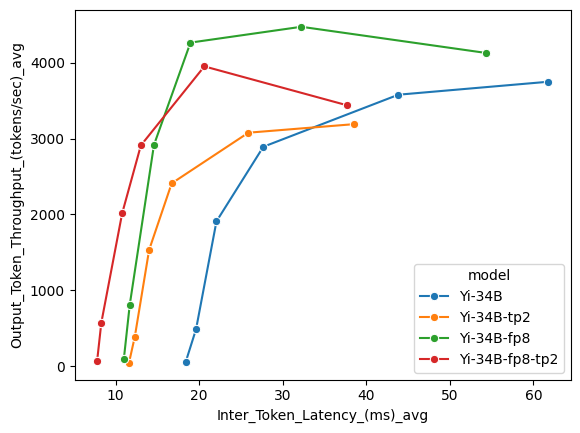

In [63]:
sns.lineplot(data=df_benchmark, x="Inter_Token_Latency_(ms)_avg", y="Output_Token_Throughput_(tokens/sec)_avg", hue="model", marker="o")

<Axes: xlabel='Time_to_First_Token_(ms)_avg', ylabel='Output_Token_Throughput_Per_User_(tokens/sec/user)_avg'>

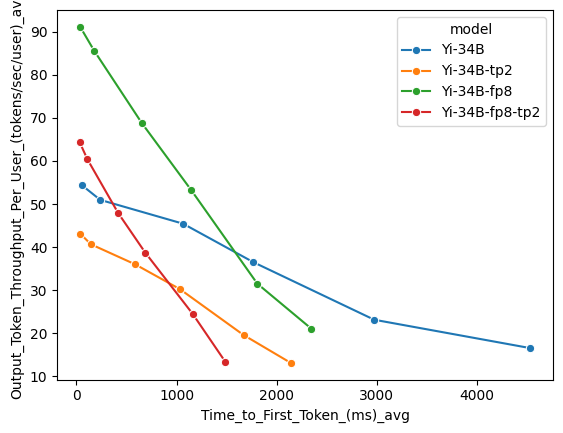

In [64]:
sns.lineplot(data=df_benchmark, x="Time_to_First_Token_(ms)_avg", y="Output_Token_Throughput_Per_User_(tokens/sec/user)_avg", hue="model", marker="o")